In [55]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# loading the dataset and applying basic analysis

data = pd.read_csv('Data/student_info.csv')
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [3]:
data.shape

(200, 2)

In [4]:
data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


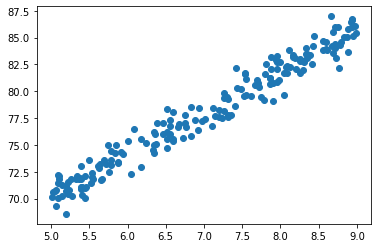

In [5]:
# plotting the scatter plot

plt.scatter(data['study_hours'], data['student_marks'])

In [6]:
# checking for null values and removing them

data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [7]:
data = SimpleImputer().fit_transform(data)
data[:5]

array([[ 6.83      , 78.5       ],
       [ 6.56      , 76.74      ],
       [ 6.99594872, 78.68      ],
       [ 5.67      , 71.82      ],
       [ 8.67      , 84.19      ]])

In [20]:
# extraction of dependend and independent variables

X, y = data[:, 0].reshape(-1, 1), data[:, 1]
X.shape

(200, 1)

In [58]:
# splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
X_train.shape

(160, 1)

In [59]:
# fitting the training set in the model

reg = LinearRegression().fit(X_train, y_train)
print('Training Set Score: {:.3f}'.format(reg.score(X_train, y_train)))
print('Testing Set Score: {:.3f}'.format(reg.score(X_test, y_test)))

Training Set Score: 0.956
Testing Set Score: 0.964


Intercept: 50.621
Slope: 3.901


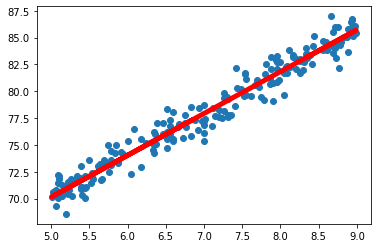

In [52]:
# plotting the regression line

print('Intercept: {:.3f}'.format(reg.intercept_))
print('Slope: {:.3f}'.format(reg.coef_[0]))

plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], reg.predict(data[:, 0].reshape(-1,1)), c='r', linewidth=5);

In [54]:
# model evaluation

y_pred = reg.predict(X_test)
print('Mean Absolute Error: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('R2 Score: {:.3f}'.format(r2_score(y_test, y_pred)))

Mean Absolute Error: 0.743
Mean Squared Error: 0.821
R2 Score: 0.969
